# Module 04 Lab - Exploratory Data Analysis

**Objective:** To learn how to explore a dataset to find patterns, anomalies, and insights before modeling. EDA is like being a detective; you are looking for clues in the data that will help you build a better model.

**This lab is fully coded.

** Your task is to run each cell, read the detailed explanations, understand the purpose of each visualization, and then complete the experimentation section.

## Part 1: Setup and Data Loading

**What is Exploratory Data Analysis (EDA)?

**EDA is the process of using summary statistics and visualizations to understand a dataset's main characteristics. Before you can build a model, you need to understand your data. What stories does it tell? Are there errors or missing values? Are there strong relationships between variables? EDA helps answer these questions.We will use the famous Titanic dataset for this lab. It contains information about passengers and, crucially, whether they survived the disaster.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# Seaborn is a library built on top of Matplotlib that makes creating beautiful plots easier.
# Load the dataset directly from a URL
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print("--- First 5 Rows ---")
print(df.head())
print("--- Basic Info ---")
# .info() is a great first command. It tells us the column names, how many non-null values are in each column, and their data types.# Notice that 'Age' and 'Cabin' have missing values!df.info()

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

## Part 2: Descriptive Statistics

Let's start by getting a high-level numerical summary of the data. The `.describe()` method is perfect for this. It calculates statistics like mean, standard deviation, min, and max for the numerical columns.

In [23]:
# Get summary statistics for numerical columns
print("--- Descriptive Statistics ---")
print(df.describe())
print("--- Key Insights from Statistics ---")
print(f"The average age of a passenger was {df['Age'].mean():.1f} years.")
print(f"The overall survival rate was {df['Survived'].mean():.1%}.")
print(f"Fares ranged from ${df['Fare'].min()} to a whopping ${df['Fare'].max()}.")

--- Descriptive Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
--- Key Insights from Statistics ---
The average a

## Part 3: Visual EDA - Telling Stories with Plots
Numbers are great, but plots make patterns and relationships immediately obvious. The goal of visual EDA is to turn data into insights.

**A Note on Plotting Libraries:***   

**Matplotlib:** The foundational library, gives you full control over everything.*   

**Seaborn:** Built on Matplotlib, it provides a simpler, high-level interface for creating common statistical plots. We will use Seaborn for its ease of use and attractive defaults.

### Visualization 1: How many survived?

A simple `countplot` is the best way to see the distribution of a categorical variable, like our target `Survived`.

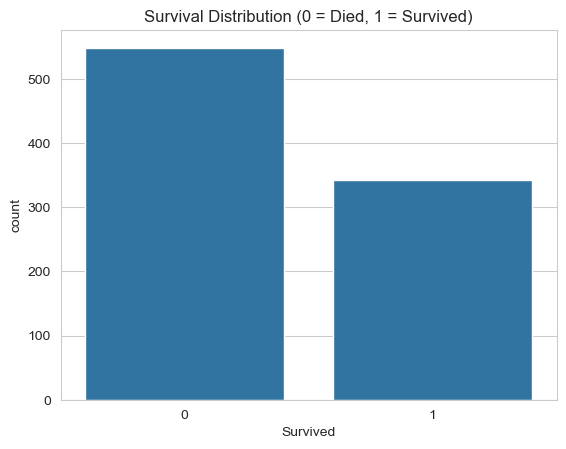

Insight: Far more people died than survived. This is an example of an imbalanced dataset, which can sometimes be a challenge for machine learning models.


In [24]:
sns.set_style('whitegrid') 
# Sets a nice visual style for our plotsplt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution (0 = Died, 1 = Survived)')
plt.show()
print("Insight: Far more people died than survived. This is an example of an imbalanced dataset, which can sometimes be a challenge for machine learning models.")

### Visualization 2: Does passenger class matter for survival?

Now we want to see if there's a relationship between two variables. We can use the `hue` parameter in `countplot` to split the bars by another category.

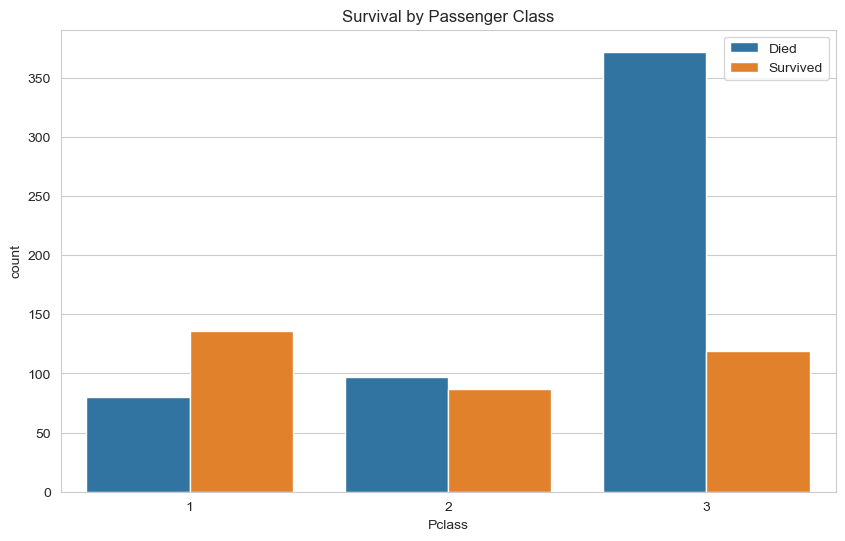

Insight: This is a very strong pattern. 1st class passengers had a much higher chance of survival compared to 3rd class passengers. Money seems to have made a difference.


In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.legend(['Died', 'Survived'])
plt.show()
print("Insight: This is a very strong pattern. 1st class passengers had a much higher chance of survival compared to 3rd class passengers. Money seems to have made a difference.")

### Visualization 3: What about gender?

The 'women and children first' mantra is famous. Let's see if the data supports it.

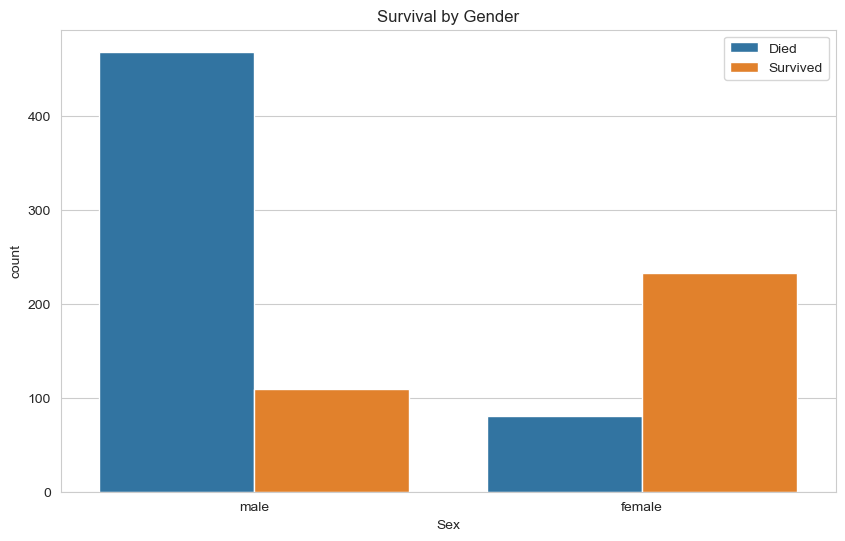

Insight: The pattern is undeniable. A much higher proportion of females survived compared to males. This is another very strong predictor.


In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.legend(['Died', 'Survived'])
plt.show()
print("Insight: The pattern is undeniable. A much higher proportion of females survived compared to males. This is another very strong predictor.")

### Visualization 4: How does age play a role?

For a continuous variable like `Age`, a histogram is a great way to see its distribution.

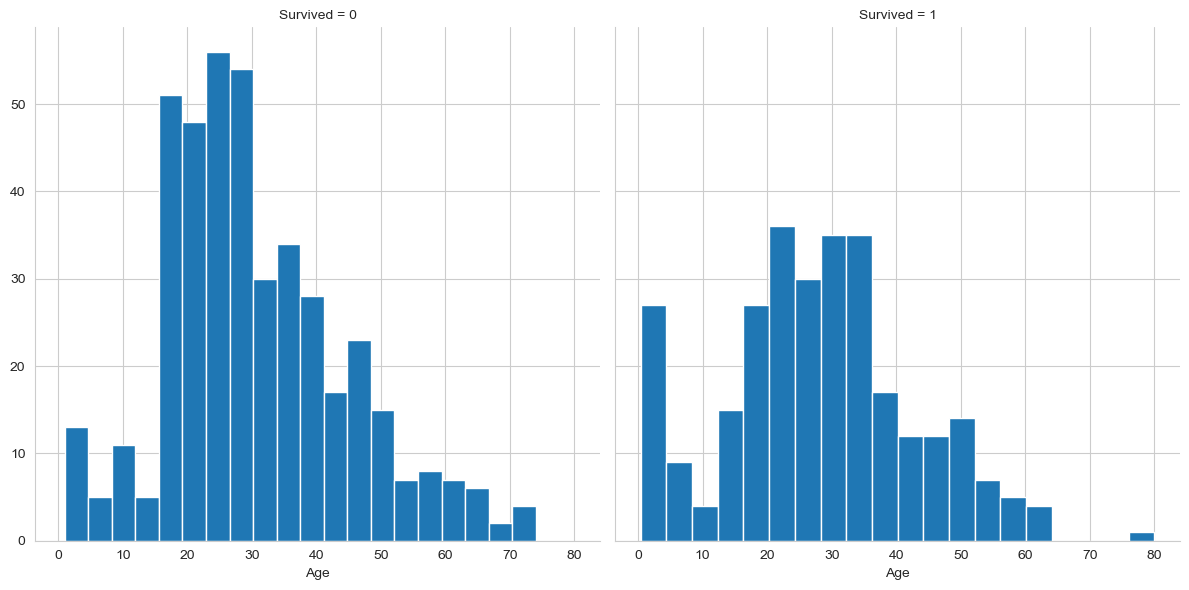

Insight: The age distribution for those who did not survive is centered around the 20-40 age range. For those who survived, there is a noticeable spike for young children. This supports the 'children' part of the mantra.


In [27]:
# A FacetGrid allows us to create multiple plots side-by-side to compare distributions.
# Here, we create one histogram for passengers who died (col='Survived'=0) and one for those who survived (col='Survived'=1).
g = sns.FacetGrid(df, col='Survived', height=6)
g.map(plt.hist, 'Age', bins=20)
plt.show()
print("Insight: The age distribution for those who did not survive is centered around the 20-40 age range. For those who survived, there is a noticeable spike for young children. This supports the 'children' part of the mantra.")

## Part 4: Student Experimentation

**Instructions:** Create your own visualizations to explore other relationships in the data.

### Experiment 1: Port of Embarkation

1.  The `Embarked` column tells you where a passenger boarded the ship (C = Cherbourg, Q = Queenstown, S = Southampton).

2.  Create a `countplot` to see how survival rates differed by the port of embarkation. Does where they boarded seem to be related to their survival?

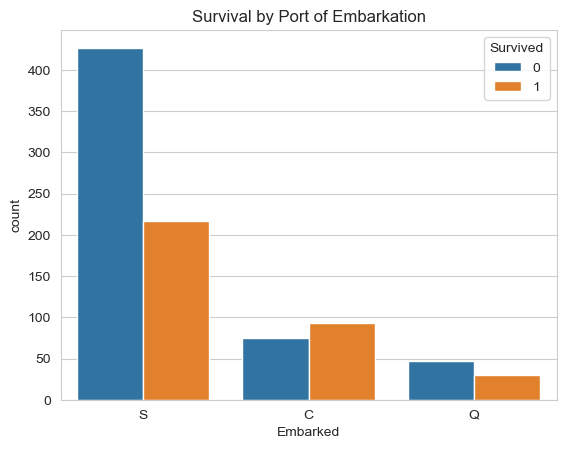

It seems that passengers that boarded on Southampton had much more survivors. Anywhere from 4-8 times the amount.


In [43]:
# --- ENTER YOUR CODE HERE ---
#Checking list to make sure that I have the columns correct.
list(df.columns)

sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Survival by Port of Embarkation")
plt.show()

#Testing/Observing data
#sns.countplot(x="Cabin", hue="Survived", data=df)
#plt.show()

#My answer to Question #2
print("It seems that passengers that boarded on Southampton had much more survivors. Anywhere from 4-8 times the amount.")

### Experiment 2: Fare vs. Survival

1.  `Fare` is a continuous numerical variable.
2.  A `boxplot` or `violinplot` is a great way to see the distribution of fares for those who survived vs. those who didn't.
3.  Create one of these plots to compare the `Fare` distribution by `Survived`. What does it tell you?

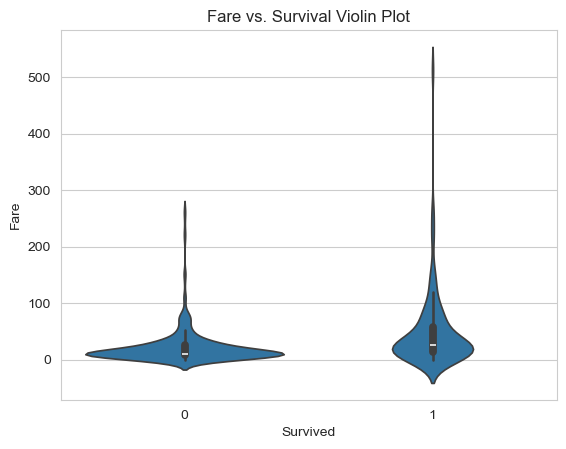

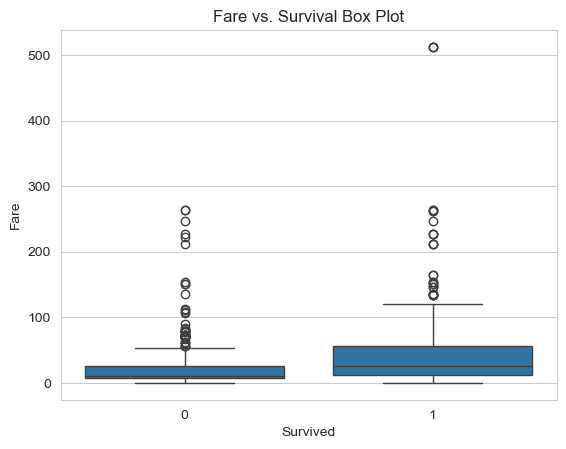

It seems like the median for those who survived is slightly higher for those who paid a higher fare.


In [49]:
# --- ENTER YOUR CODE HERE ---

#Violinplot
sns.violinplot(x = "Survived", y = "Fare", data=df)
plt.title("Fare vs. Survival Violin Plot")
plt.show()

#Boxplot
sns.boxplot(x = "Survived", y = "Fare", data=df)
plt.title("Fare vs. Survival Box Plot")
plt.show()

#Answer for Step #3
print("It seems like the median for those who survived is slightly higher for those who paid a higher fare.")

## 📝 Knowledge Check

**Instructions:** Answer the following questions in this markdown cell.
1.  **What is the primary goal of Exploratory Data Analysis (EDA)?**
   - The primary goal for Exploratory Data Analysis is to look for clues in the data to help build a better model.
2.  **Based on the plots in this lab, what kind of person had the best chance of surviving the Titanic?** (Describe them in terms of class, gender, and age).
   - The people who had the best chance of survival on the Titanic were younger people who were male, embarked from Southampton, and paid a larger fare.
3.  **Why is it important to visualize data instead of just looking at summary statistics?** What can a plot show you that a number like 'mean' or 'count' can't?
   - It's important to visualize data because you can see the outliers or spot weird data patterns.